In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sts
from tqdm import tqdm
from sklearn import metrics
from datetime import timedelta
from numpy import linalg
import statsmodels

import warnings
warnings.filterwarnings("ignore")

In [72]:
def plot_acf_pacf(timeseries):
    """
    Функция, отображающая график временного ряда, 
    автокорреляционную функцию(ACF)
    и частную автокорреляционную функцию(PACF).
    """
    fig = plt.figure(figsize=(16,20))
    
    ax0 = fig.add_subplot(311)
    timeseries.plot(ax=ax0)
    ax0.set_title('График временного ряда')
    ax0.set_xlabel('Дата')
    ax0.set_ylabel('Количество новых заболеваний')
    
    ax1 = fig.add_subplot(312)
    fig = sm.graphics.tsa.plot_acf(timeseries, ax=ax1)
    ax1.set_title('Автокорреляционная функция')
    
    ax2 = fig.add_subplot(313)
    fig = sm.graphics.tsa.plot_pacf(timeseries, ax=ax2)
    ax2.set_title('Частная автокорреляционная функция')

def adf_test(timeseries):
    pvalue = sm.tsa.stattools.adfuller(timeseries)[1]
    print("Критерий Дики-Фуллера: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен, нужно большее d")
    else:
        print("Ряд стационарен, d подходит")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='c')[1]
    print("Критерий Дики-Фуллера с константой: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='ct')[1]
    print("Критерий Дики-Фуллера с константой и трендом: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='ctt')[1]
    print("Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='nc')[1]
    print("Критерий Дики-Фуллера без константы и тренда: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")

In [73]:
# функция с построением моделей
def adf_test3(timeseries):
    dif_1 = ts.diff().dropna()  
    print('\nШАГ 1')
    print('\nОцениваем модель авторегрессии 1го порядка с трендом и константой')
    print(statsmodels.tsa.ar_model.AutoReg(timeseries,lags=1,trend='ct').fit().summary())
    # проверка гипотезы о равенсте коэф авторегрессии 0
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='ct')[1]
    print("\nКритерий Дики-Фуллера с константой и линейным трендом (о равенсте коэф авторегрессии 0): p=%f" % pvalue)
    if pvalue < 0.05:
        print("\nРяд класса TS")  
    else:
        # нулевая гипотеза принимается 
        print('\nСтроим модель только с трендом и конст, чтобы убедиться, что правильно включили тренд')
        print(statsmodels.tsa.ar_model.AutoReg(dif_1,lags=0,trend='ct').fit().summary()) 
        print("\nЕсли коэффициент при тренде значим, ряд класса DS (случайное блуждание с дрейфом и детерминированным трендом)")         
    
    print('\nШАГ 2')
    print('\nОцениваем модель авторегрессии 1го порядка с константой')
    print(statsmodels.tsa.ar_model.AutoReg(timeseries,lags=1,trend='c').fit().summary())
    # проверка гипотезы о равенсте коэф авторегрессии 0
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='c')[1]
    print("\nКритерий Дики-Фуллера с константой (о равенсте коэф авторегрессии 0): p=%f" % pvalue)
    if pvalue > 0.05:
        # нулевая гипотеза принимается  
        print('\nСтроим модель только с конст, чтобы убедиться, что правильно включили конст')
        print(statsmodels.tsa.ar_model.AutoReg(dif_1,lags=0,trend='c').fit().summary())
        print("\nЕсли коэффициент при константе значим, ряд класса DS (случайное блуждание с дрейфом)")
    else:
        print("\nРяд класса TS (стационарный ряд с ненулевой средней)")
 
    print('\nШАГ 3')
    print('\nОцениваем модель авторегрессии 1го порядка без константы')
    print(statsmodels.tsa.ar_model.AutoReg(timeseries,lags=1,trend='n').fit().summary())
    # проверка гипотезы о равенсте коэф авторегрессии 0
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='nc')[1]
    print("\nКритерий Дики-Фуллера без константы и тренда (о равенсте коэф авторегрессии 0): p=%f" % pvalue)
    if pvalue > 0.05:
        # нулевая гипотеза принимается 
        print("\nРяд класса DS (случайное блуждание без дрейфа)")  
    else:
        print("\nРяд класса TS (процесс AR с нулевым мат ожиданием)")

# Загрузка данных

In [74]:
ts = pd.read_excel('data\lab5.xlsx', index_col='date', parse_dates=['date'])['new_cases'].dropna() # !!!!!!!!!!
print(f"Длина временного ряда: {ts.shape[0]}")
ts = ts.resample('1W').mean()[:-1]
ts.head(15)


Длина временного ряда: 662


date
2020-03-01      1.000000
2020-03-08      4.428571
2020-03-15    118.428571
2020-03-22     75.857143
2020-03-29    142.857143
2020-04-05    282.000000
2020-04-12    257.857143
2020-04-19    172.857143
2020-04-26    170.142857
2020-05-03    135.428571
2020-05-10    129.428571
2020-05-17     71.142857
2020-05-24     61.857143
2020-05-31     44.142857
2020-06-07     39.857143
Freq: W-SUN, Name: new_cases, dtype: float64

Text(0, 0.5, 'Количество новых заболеваний')

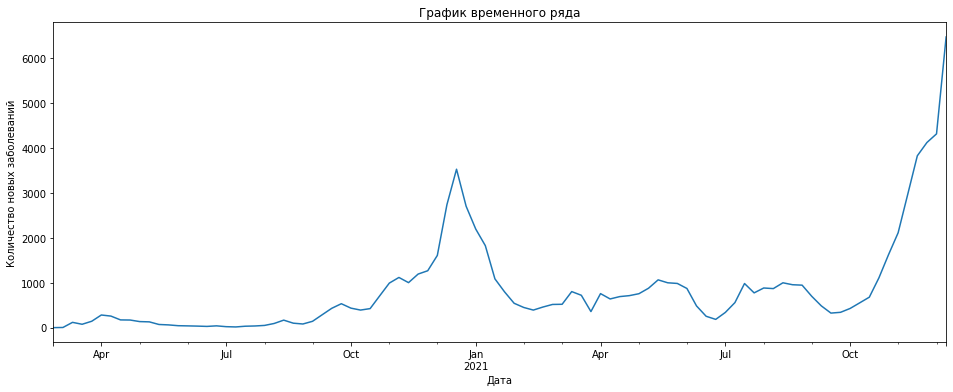

In [75]:
fig = plt.figure(figsize=(16,20))
    
ax0 = fig.add_subplot(311)
ts.plot(ax=ax0)
ax0.set_title('График временного ряда')
ax0.set_xlabel('Дата')
ax0.set_ylabel('Количество новых заболеваний')

# Определение типа ряда

In [76]:
adf_test3(ts)


ШАГ 1

Оцениваем модель авторегрессии 1го порядка с трендом и константой
                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                   94
Model:                     AutoReg(1)   Log Likelihood                -672.770
Method:               Conditional MLE   S.D. of innovations            335.341
Date:                Wed, 22 Dec 2021   AIC                             11.716
Time:                        05:02:23   BIC                             11.825
Sample:                    03-08-2020   HQIC                            11.760
                         - 12-12-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -86.3152     71.274     -1.211      0.226    -226.010      53.379
trend            1.5706      1.508      1.041      

# Определение порядка разности d и компонент p, q.

### График временного ряда, АКФ и ЧАКФ

Критерий Дики-Фуллера: p=0.992077
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=0.992077
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=0.994474
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.956704
Ряд нестационарен


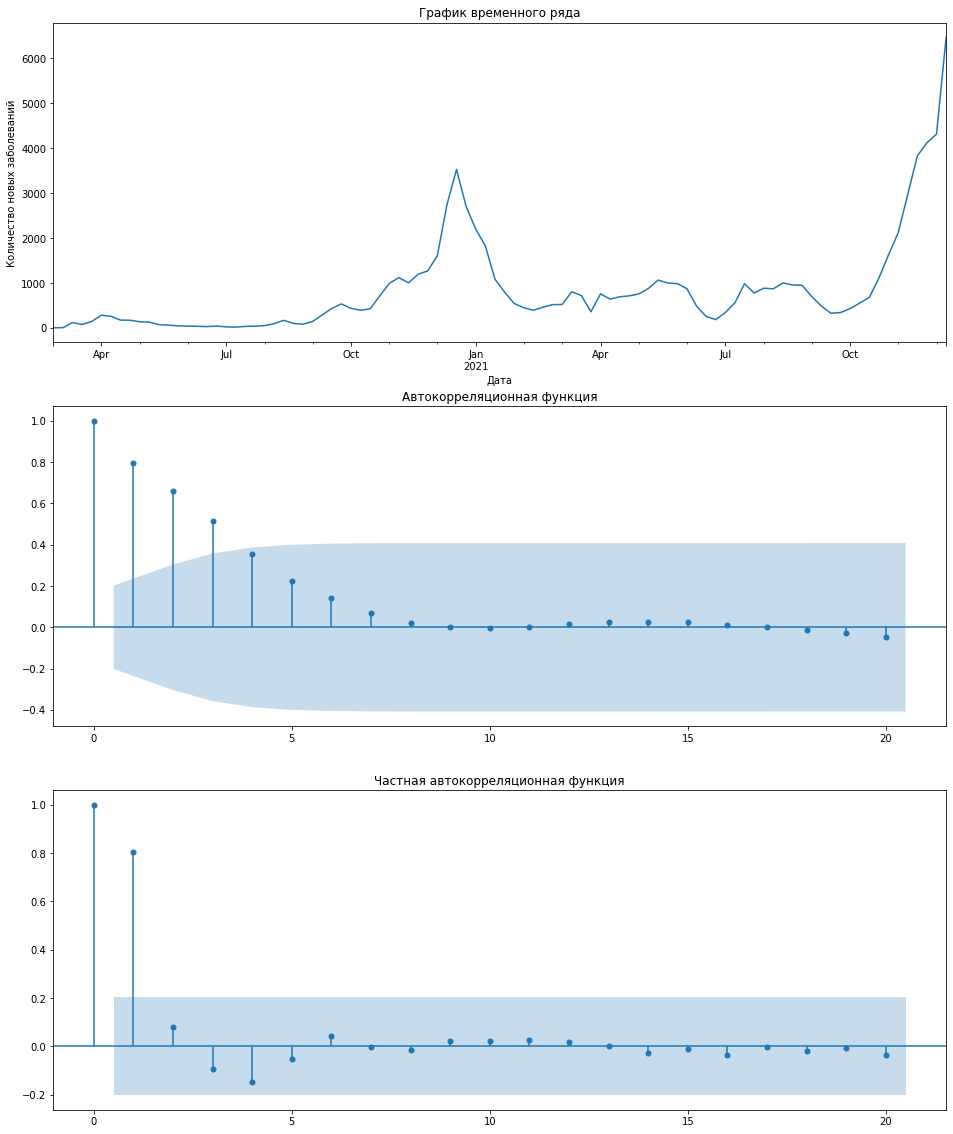

In [77]:
adf_test(ts)
plot_acf_pacf(ts)

### График первых разностей

Критерий Дики-Фуллера: p=0.433629
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=0.433629
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=0.570312
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.442707
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.123976
Ряд нестационарен


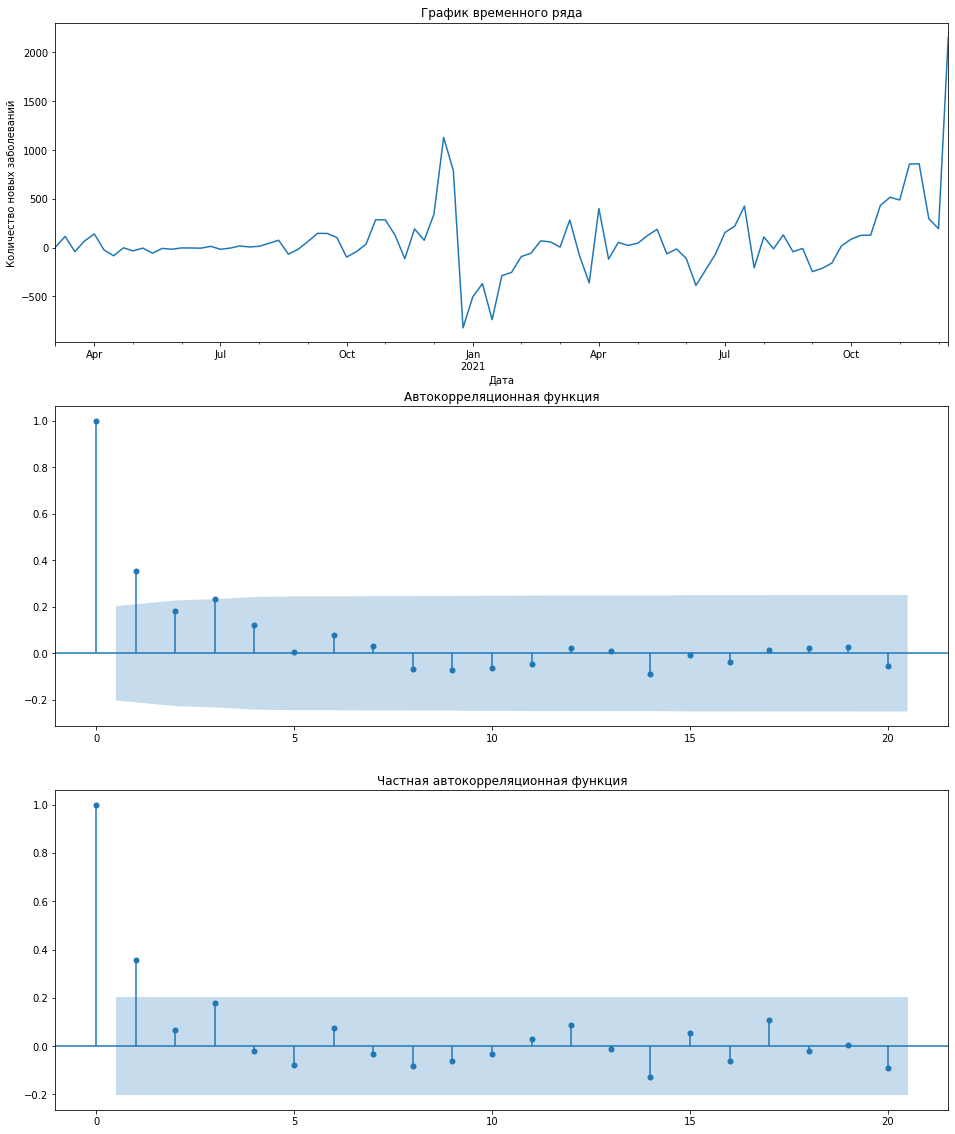

In [78]:
dif_1 = ts.diff().dropna()
adf_test(dif_1)
plot_acf_pacf(dif_1)

### График вторых разностей

Критерий Дики-Фуллера: p=0.000000
Ряд стационарен, d подходит
Критерий Дики-Фуллера с константой: p=0.000000
Ряд стационарен
Критерий Дики-Фуллера с константой и трендом: p=0.000001
Ряд стационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.000001
Ряд стационарен
Критерий Дики-Фуллера без константы и тренда: p=0.000000
Ряд стационарен


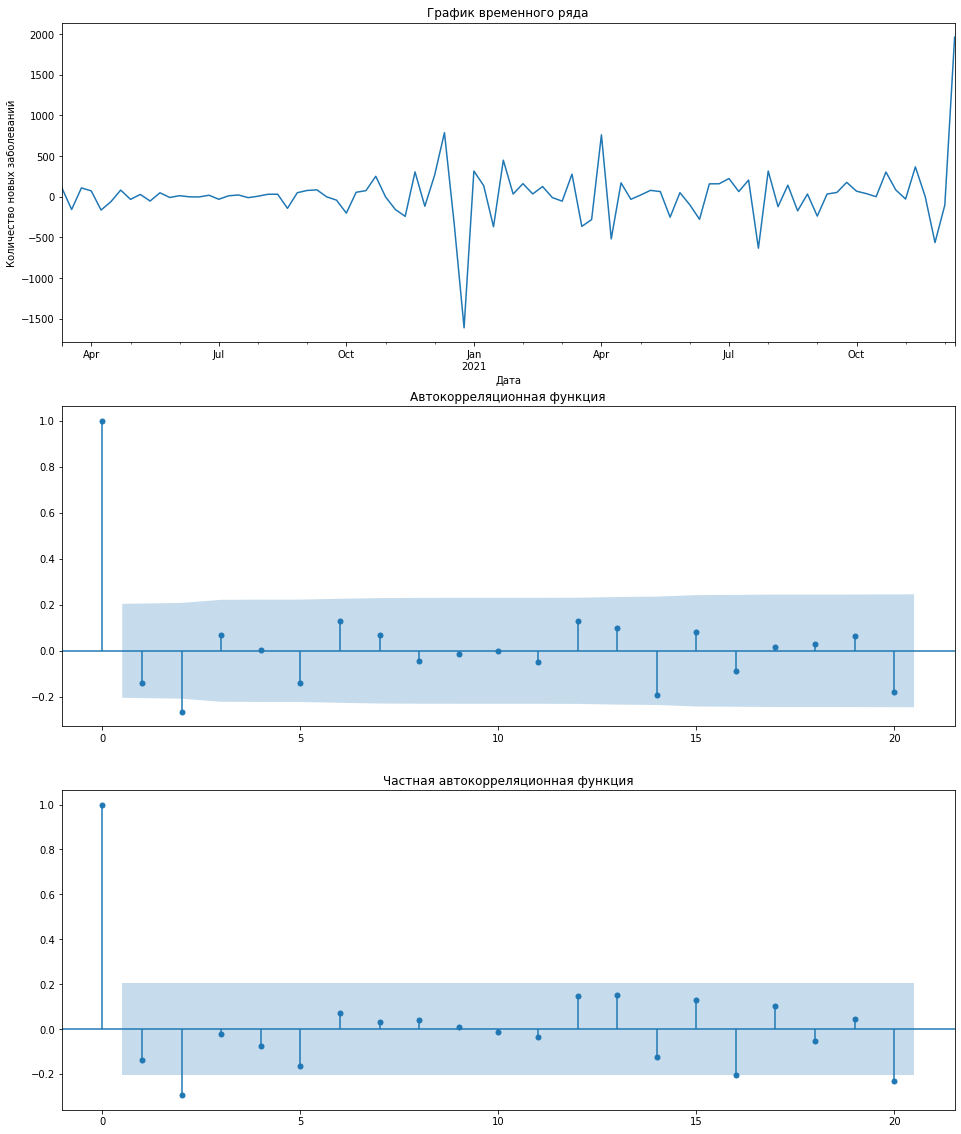

In [79]:
dif_2 = ts.diff().diff().dropna()
adf_test(dif_2)
plot_acf_pacf(dif_2)

### p и q определяются по графикам АКФ и ЧАКФ для подходящего значения d

# Оценка параметров моделей

* Log Lokehood - логарифм правдоподобия
* S.D. of inovations - стандартная ошибка модели
* AIC - информационный критерий Аккаике
* BIC - информационный критерий Байеса
* HQIC - информационный критерий Хеннана-Куинна
* coef - значение коэффициента
* P>|z| - p-value для гипотезы о незначимости коэффициента (если больше 0.05 - незначим)

# Поиск 5 лучших моделей: перебор параметров

In [80]:
d = range(0, 4)
q = range(0, 8)
p = range(0, 8)

from itertools import product

parameters = list(product(p,d,q))
len(parameters)

256

In [81]:
# Может выполняться несколько минут
results = []
best_bic = float("inf")

for param in tqdm(parameters):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model = sm.tsa.ARIMA(ts, order=param).fit()
    except (ValueError, linalg.LinAlgError):
        continue
    bic = model.bic
    #сохраняем лучшую модель, bic, параметры
    if bic < best_bic:
        best_model = model
        best_bic = bic
        best_param = param
    results.append([param, model.bic])

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'bic']
result_table.sort_values(by = 'bic', ascending=True).head(5)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [01:04<00:00,  3.95it/s]


parameters          bic
18  (0, 2, 2)  1336.054324
40  (2, 2, 0)  1337.785404
17  (0, 2, 1)  1338.395615
29  (1, 2, 1)  1339.085347
19  (0, 2, 3)  1340.111852

### Для начала поработаем с лучшей моделью (можно указать любую модель из 5)

In [82]:
model = sm.tsa.ARIMA(ts, order=(1, 2, 1)).fit() # !!!!!!!!!!!
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.new_cases   No. Observations:                   92
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -660.499
Method:                       css-mle   S.D. of innovations            316.454
Date:                Wed, 22 Dec 2021   AIC                           1328.998
Time:                        05:03:52   BIC                           1339.085
Sample:                    03-15-2020   HQIC                          1333.069
                         - 12-12-2021                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.9037      9.734      1.017      0.309      -9.174      28.981
ar.L1.D2.new_cases     0.3453      0.171      2.015      0.044       0.009       0.681
ma.L1.D2.new_cases    -0.8238      0.115     -7.160      0.000      -1.049      -0.598
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.8964           +0.0000j            2.8964            0.0000
MA.1            1.2139           +0.0000j            1.2139            0.0000
-----------------------------------------------------------------------------
"""

---

# Проверка адекватности модели

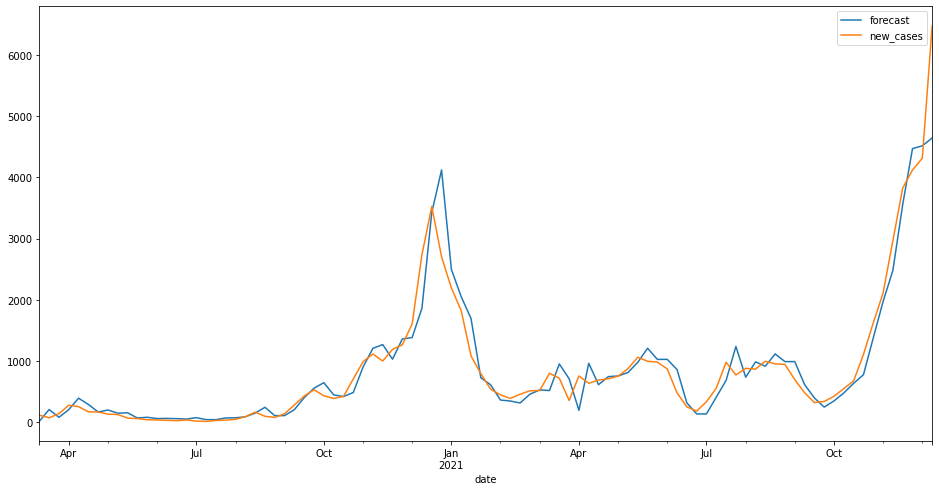

In [83]:
fig, ax = plt.subplots(figsize=(16,8))
model.plot_predict(ax=ax)
fig.show()

In [84]:
pred = model.predict(typ='levels')
print('MSE =', metrics.mean_squared_error(ts[2:], pred))
print('RMSE =', np.sqrt(metrics.mean_squared_error(ts[2:], pred)))
print('MAE =', metrics.mean_absolute_error(ts[2:], pred))
print('MAPE =', metrics.mean_absolute_percentage_error(ts[2:], pred))
print('R2 =', metrics.r2_score(ts[2:], pred))

MSE = 100207.26744787172
RMSE = 316.55531498913695
MAE = 174.97706645164473
MAPE = 0.3645468921068331
R2 = 0.9141420189962078


# Проверка нормальности остатков

Критерий Дики-Фуллера: p=0.722255
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=0.722255
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.179013
Ряд нестационарен


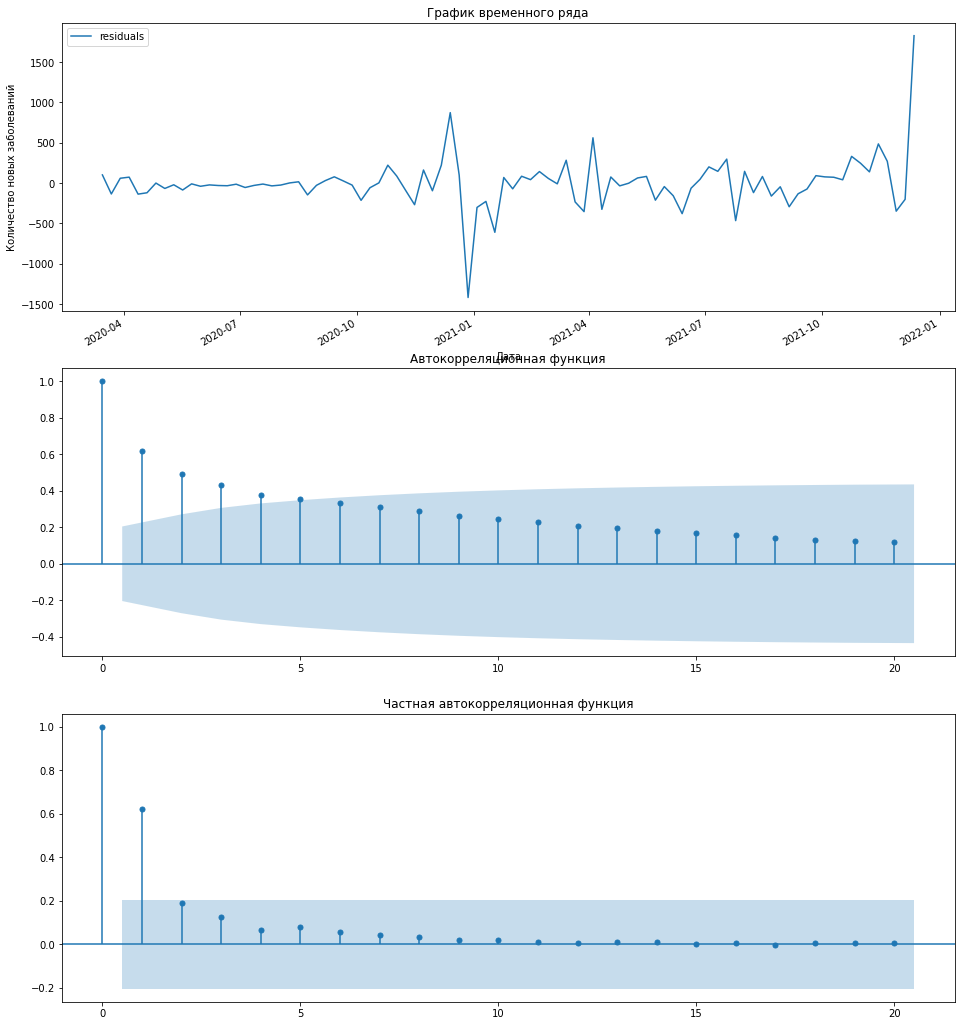

In [85]:
resid = pd.DataFrame(model.resid, columns=['residuals']).sort_values(by='residuals')
adf_test(resid)
plot_acf_pacf(resid)

Тест на нормальность: p = 0.000000
Распределение остатков ненормальное


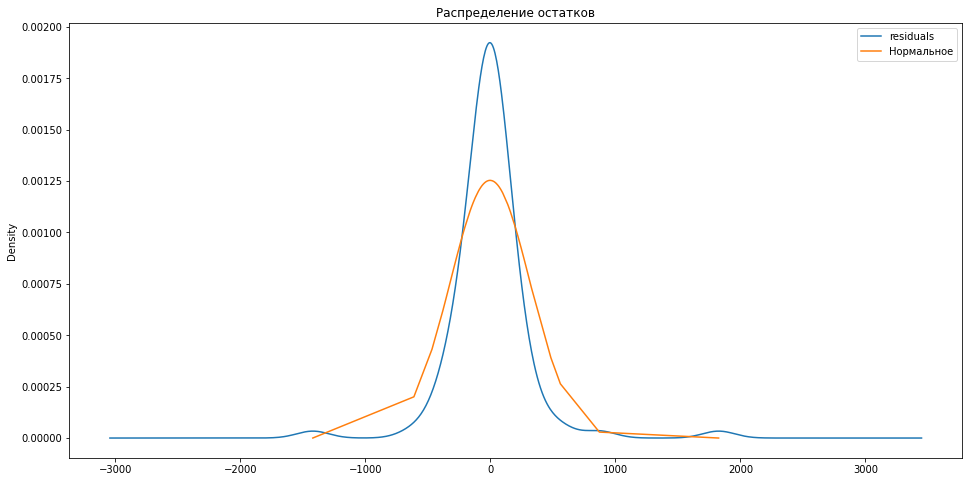

In [86]:
pvalue = sts.normaltest(resid['residuals'])[1]
print("Тест на нормальность: p = %f" % pvalue)
if pvalue > 0.05:
    print("Распределение остатков нормальное")
else:
    print("Распределение остатков ненормальное")

fig, ax = plt.subplots(figsize=(16,8))
resid.plot.kde(ax=ax)
plt.title('Распределение остатков')
plt.plot(resid, sts.norm.pdf(resid, resid.mean(), resid.std()), label='Нормальное')
plt.legend()
fig.show()

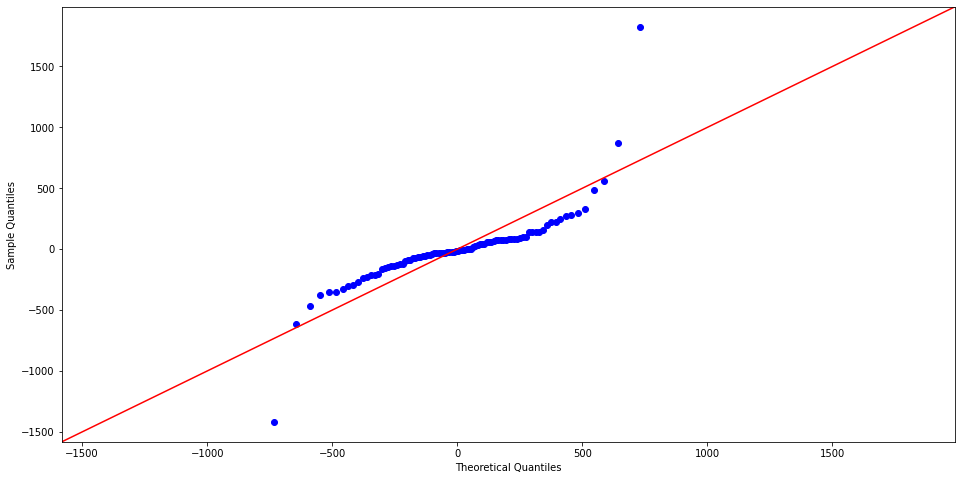

In [87]:
fig, ax = plt.subplots(figsize=(16,8))
sm.qqplot(resid['residuals'], loc=resid['residuals'].mean(), scale = resid['residuals'].std(), line='45', ax=ax)
fig.show()

# Предсказание будущих показателей

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.new_cases   No. Observations:                   92
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -660.499
Method:                       css-mle   S.D. of innovations            316.454
Date:                Wed, 22 Dec 2021   AIC                           1328.998
Time:                        05:04:04   BIC                           1339.085
Sample:                    03-15-2020   HQIC                          1333.069
                         - 12-12-2021                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.9037      9.734      1.017      0.309      -9.174      28.981
ar.L1.D2.new_cases     0.3453      0.171      2.015      0.044       0.009       0.681
ma.L1.D2.new_cases    -0.8238      0.115     -7.160      0.000      -1.049      -0.598
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.8964           +0.0000j            2.8964            0.0000
MA.1            1.2139           +0.0000j            1.2139            0.0000
-----------------------------------------------------------------------------
"""

Последняя дата во временном ряду:  2021-12-12 00:00:00
Предсказание на 4 недели, до: 2022-01-09 00:00:00


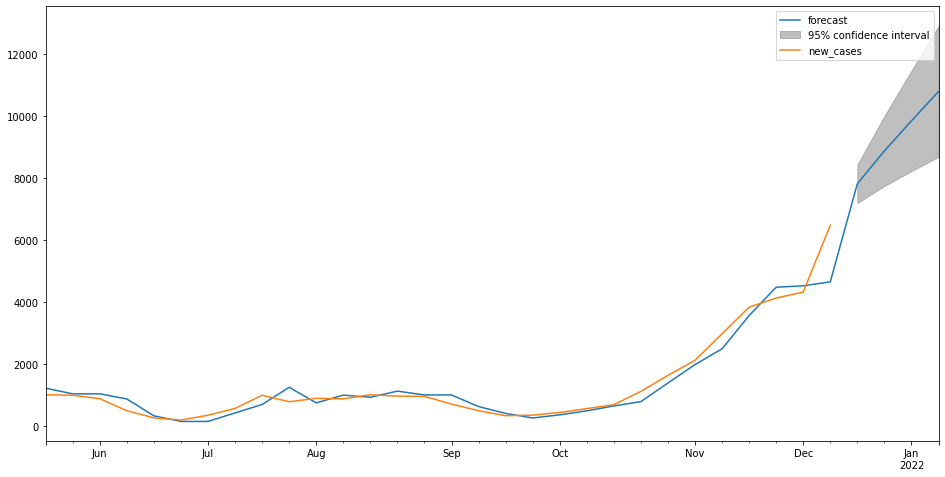

In [89]:
weeks_pred = 4 # количество недель для предсказания !!!!!!!!!!!!!

print("Последняя дата во временном ряду: ", ts.index[-1])
print(f"Предсказание на {weeks_pred} недели, до: {ts.index[-1] + timedelta(weeks=weeks_pred)}")

fig, ax = plt.subplots(figsize=(16,8))
model.plot_predict(start=ts.index[-30], end=(ts.index[-1] + timedelta(weeks=weeks_pred)), ax=ax)
fig.show()

In [90]:
pred = model.predict(start=ts.index[-1] + timedelta(days=1), end=(ts.index[-1] + timedelta(weeks=weeks_pred)), typ='levels')
pred

2021-12-19     7804.586799
2021-12-26     8864.270862
2022-01-02     9834.936731
2022-01-09    10781.353306
Freq: W-SUN, dtype: float64

# Соберем ансамбль предсказаний

In [91]:
result_table.sort_values(by = 'bic', ascending=True).head(5)

parameters          bic
18  (0, 2, 2)  1336.054324
40  (2, 2, 0)  1337.785404
17  (0, 2, 1)  1338.395615
29  (1, 2, 1)  1339.085347
19  (0, 2, 3)  1340.111852

## Меняем параметры моделей на табличные

In [92]:
model1 = sm.tsa.ARIMA(ts, order=(1, 2, 1)).fit()
model2 = sm.tsa.ARIMA(ts, order=(0, 2, 4)).fit()
model3 = sm.tsa.ARIMA(ts, order=(0, 2, 5)).fit()
model4 = sm.tsa.ARIMA(ts, order=(0, 2, 2)).fit()
model5 = sm.tsa.ARIMA(ts, order=(0, 2, 1)).fit()

## Сохраняем предсказания ансамбля и доверительные интервалы в Excel-файл

In [93]:
forecast = pd.DataFrame(index=pred.index)
res1 = model1.forecast(weeks_pred)
res2 = model2.forecast(weeks_pred)
res3 = model3.forecast(weeks_pred)
res4 = model4.forecast(weeks_pred)
res5 = model5.forecast(weeks_pred)
forecast['value1'] = res1[0]
forecast['value2'] = res2[0]
forecast['value3'] = res3[0]
forecast['value4'] = res4[0]
forecast['value5'] = res5[0]
forecast['result'] = (forecast['value1']+forecast['value2']+forecast['value3']+forecast['value4']+forecast['value5'])/5
forecast['left_border'] = [x[0] for x in res1[2]]
forecast['right_border'] = [x[1] for x in res1[2]]
forecast.to_excel('forecast.xlsx')
forecast

value1        value2        value3        value4  \
2021-12-19   7804.586799   8142.996588   8050.278420   8075.078841   
2021-12-26   8864.270862   9057.999720   8778.424448   9026.382819   
2022-01-02   9834.936731  10038.671742   9697.518847   9988.072817   
2022-01-09  10781.353306  11031.270571  10626.667945  10960.148835   

                  value5        result  left_border  right_border  
2021-12-19   7571.656243   7928.919378  7184.348241   8424.825357  
2021-12-26   8686.744417   8882.764453  7735.014951   9993.526772  
2022-01-02   9813.550234   9874.550074  8212.714027  11457.159436  
2022-01-09  10952.073696  10870.302871  8670.732478  12891.974135

# Добавим сезонность и построим SARIMA

Общий вид модели - **SARIMA (p,d,q) (P,D,Q) s**

* p - порядок модели AR
* d - порядок интегрирования
* q - порядок модели MA
* P - порядок сезонной составляющей SAR
* D - порядок интегрирования сезонной составляющей
* Q - порядок сезонной составляющей SMA
* s - размерность сезонности

### Для начала надо провести сдвиг по сезонности, можно попробовать разные, рекомендуемый 4-6 месяцев.

Сезонная разность:
Критерий Дики-Фуллера: p=0.973935
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=0.973935
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=0.996745
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.998009
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.834277
Ряд нестационарен
------------------------------
Интегрированная сезонная разность:
Критерий Дики-Фуллера: p=0.016012
Ряд стационарен, d подходит
Критерий Дики-Фуллера с константой: p=0.016012
Ряд стационарен
Критерий Дики-Фуллера с константой и трендом: p=0.029457
Ряд стационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.007683
Ряд стационарен
Критерий Дики-Фуллера без константы и тренда: p=0.001596
Ряд стационарен


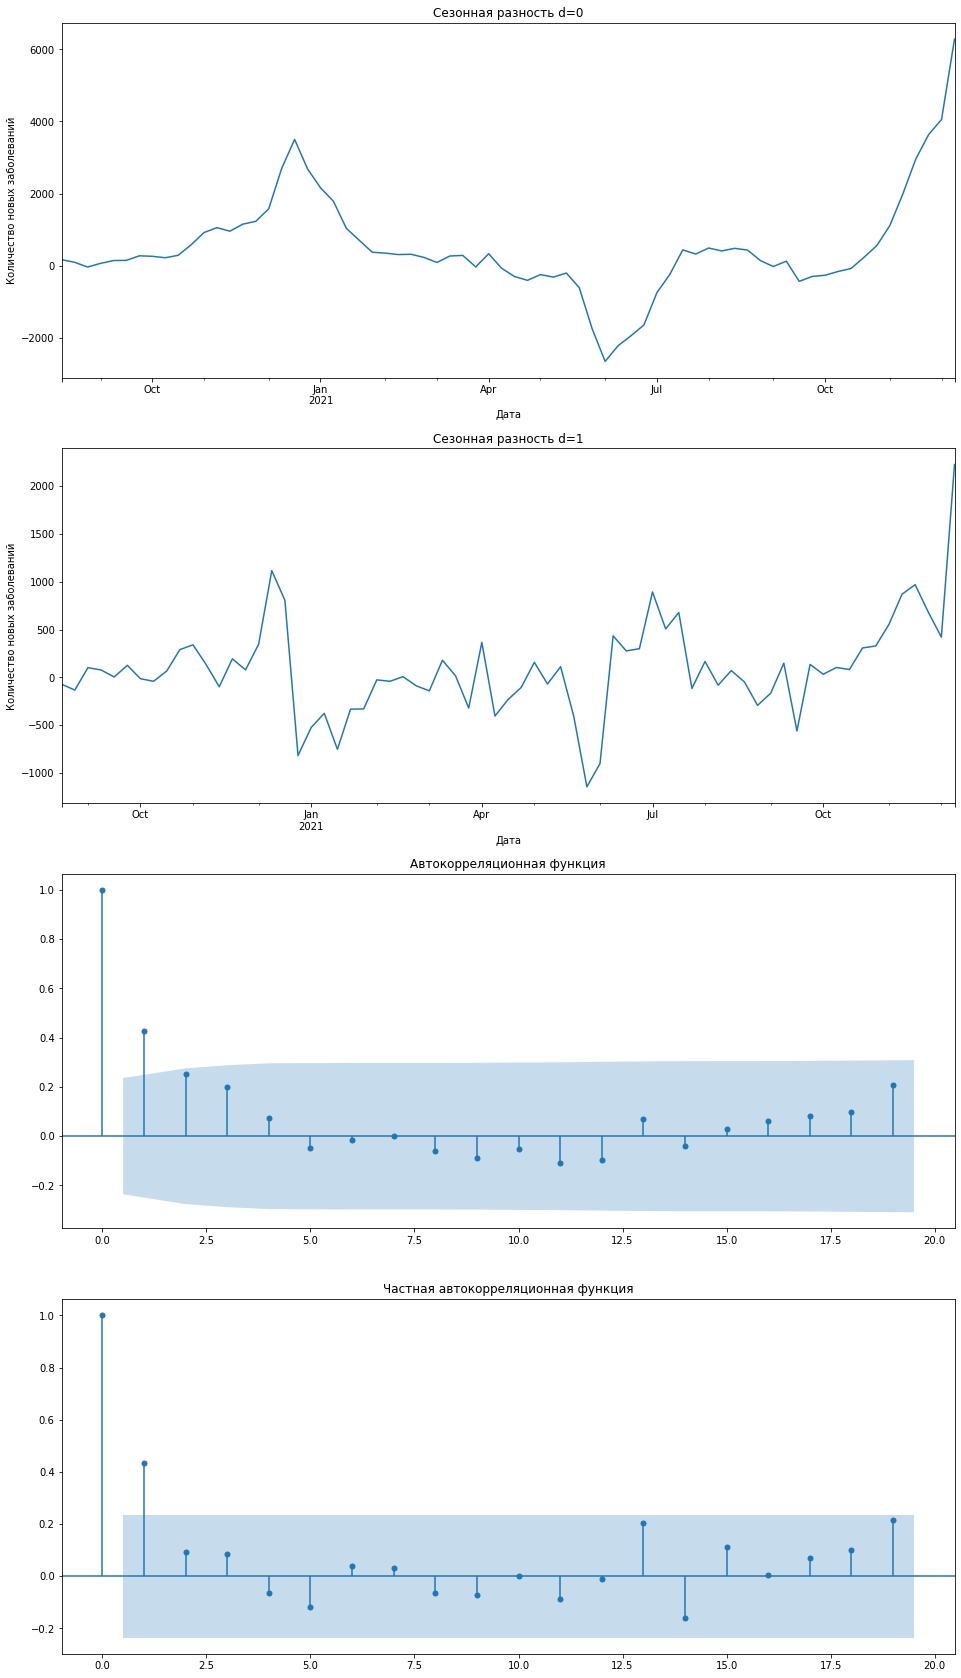

In [94]:
months_seasonal = 6 # !!!!!!!!!!!!


ts_4m = ts.diff(4*months_seasonal).dropna()
print("Сезонная разность:")
adf_test(ts_4m)

print("-"*30)
dif_4m = ts.diff(4*months_seasonal).diff().dropna()
print("Интегрированная сезонная разность:")
adf_test(dif_4m)

# dif2_4m = ts.diff(30*monhts_seasonal).diff().diff().dropna()
# adf_test(dif2_4m)

fig = plt.figure(figsize=(16,30))
    
ax0 = fig.add_subplot(411)
ts_4m.plot(ax=ax0)
ax0.set_title('Сезонная разность d=0')
ax0.set_xlabel('Дата')
ax0.set_ylabel('Количество новых заболеваний')

ax0 = fig.add_subplot(412)
dif_4m.plot(ax=ax0)
ax0.set_title('Сезонная разность d=1')
ax0.set_xlabel('Дата')
ax0.set_ylabel('Количество новых заболеваний')

ax1 = fig.add_subplot(413)
fig = sm.graphics.tsa.plot_acf(dif_4m, ax=ax1)
ax1.set_title('Автокорреляционная функция')

ax2 = fig.add_subplot(414)
fig = sm.graphics.tsa.plot_pacf(dif_4m, ax=ax2)
ax2.set_title('Частная автокорреляционная функция')

fig.show()

### P и Q определяются по графикам АКФ и ЧАКФ для подходящего значения D сезонной разности

In [95]:
%%time 

#Модель SARIMA может тренироваться долго - если ставить значения параметров больше 1 время растет в геометрической прогресии... 

p = 1
d = 4
q = 1
P = 1
D = 2
Q = 1
s = 4*months_seasonal

sarima = sm.tsa.statespace.SARIMAX(ts, order=(p, d, q), 
                                seasonal_order=(P, D, Q, s)).fit()
print(sarima.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                          new_cases   No. Observations:                   94
Model:             SARIMAX(1, 4, 1)x(1, 2, 1, 24)   Log Likelihood                -335.235
Date:                            Wed, 22 Dec 2021   AIC                            680.471
Time:                                    05:08:53   BIC                            689.159
Sample:                                03-01-2020   HQIC                           683.655
                                     - 12-12-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6907      0.164     -4.219      0.000      -1.012      -0.370
ma.L1         -0.9999    177.178   

---

# Проверка адекватности сезонной модели

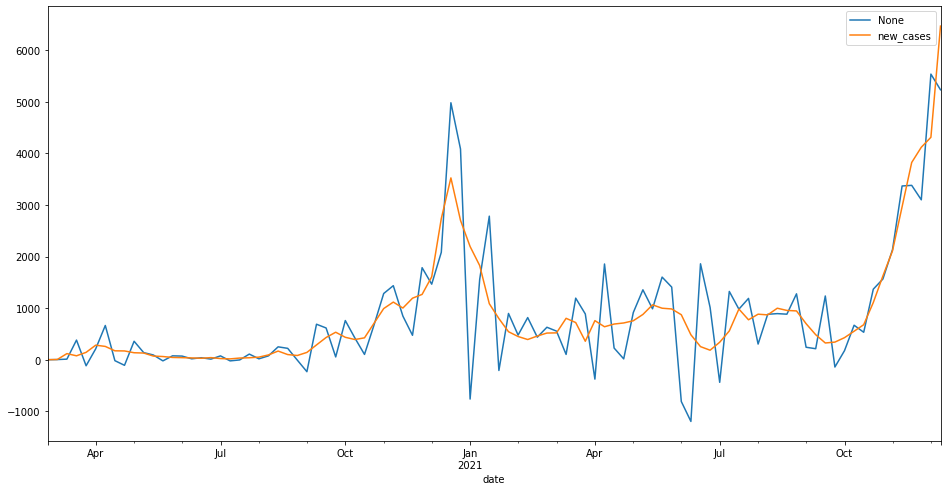

In [96]:
fig, ax = plt.subplots(figsize=(16,8))
pred = sarima.predict(typ='levels')
pred.plot(ax=ax)
ts.plot(ax=ax)
plt.legend()
fig.show()

In [97]:
print('MSE =', metrics.mean_squared_error(ts, pred))
print('RMSE =', np.sqrt(metrics.mean_squared_error(ts, pred)))
print('MAE =', metrics.mean_absolute_error(ts, pred))
print('MAPE =', metrics.mean_absolute_percentage_error(ts, pred))
print('R2 =', metrics.r2_score(ts, pred))

MSE = 444612.9608051158
RMSE = 666.7930419591343
MAE = 430.0430867676704
MAPE = 0.9155011874857739
R2 = 0.615927773109699


# Проверка нормальности остатков

Критерий Дики-Фуллера: p=0.998615
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=0.998615
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=1.000000
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.989961
Ряд нестационарен


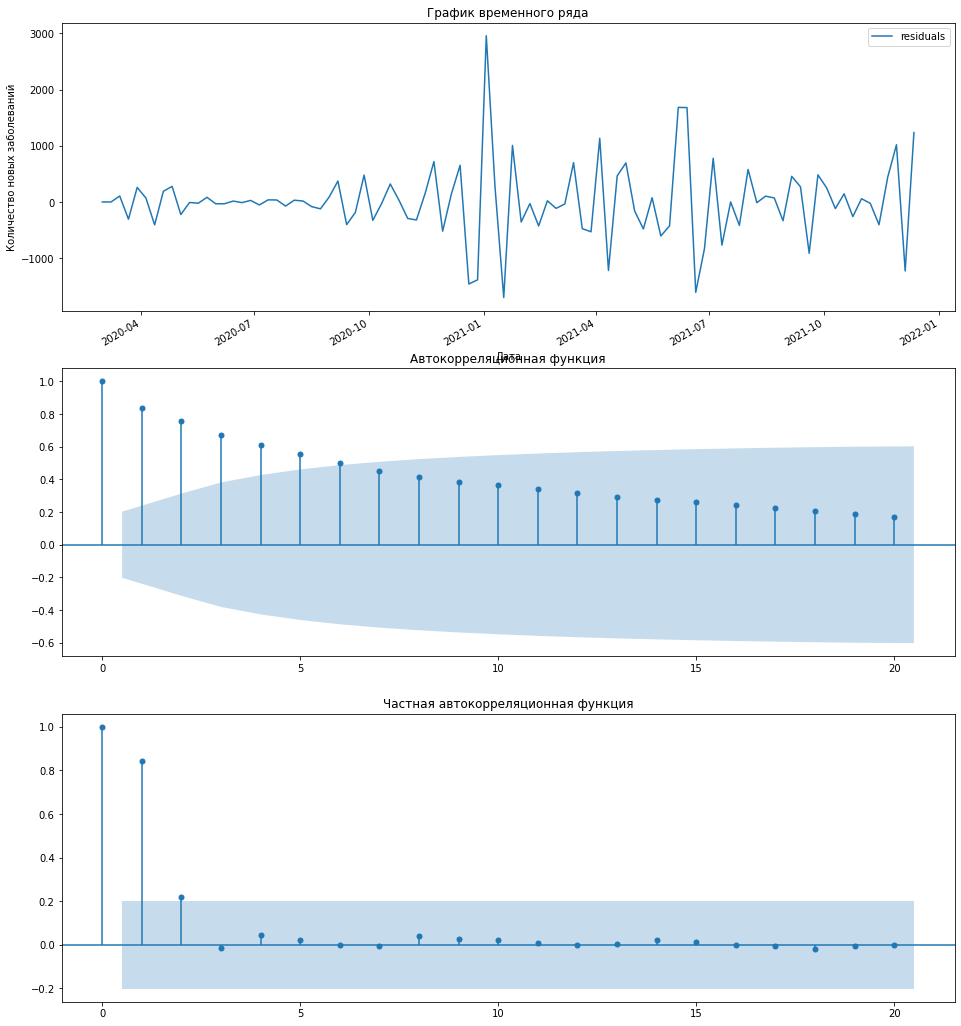

In [98]:
resid = pd.DataFrame(sarima.resid, columns=['residuals']).sort_values(by='residuals')
adf_test(resid)
plot_acf_pacf(resid)

Тест на нормальность: p = 0.000010
Распределение остатков ненормальное


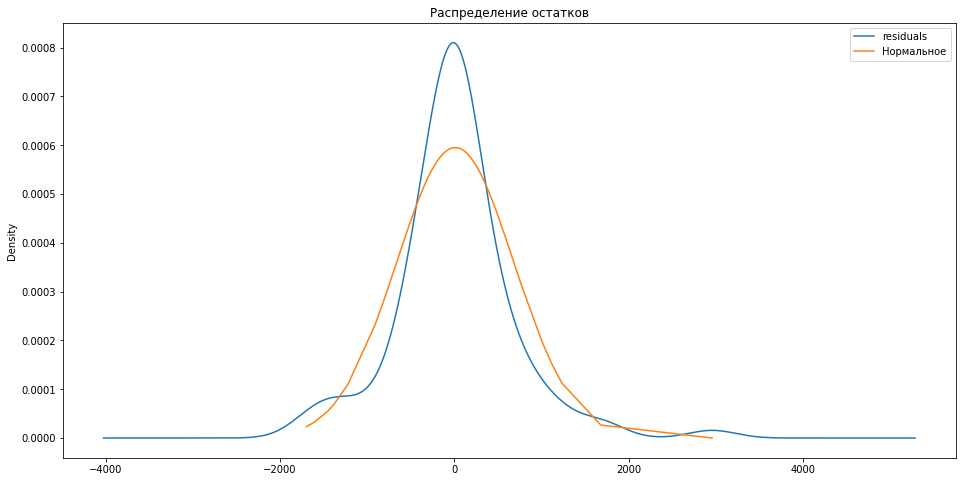

In [99]:
pvalue = sts.normaltest(resid['residuals'])[1]
print("Тест на нормальность: p = %f" % pvalue)
if pvalue > 0.05:
    print("Распределение остатков нормальное")
else:
    print("Распределение остатков ненормальное")

fig, ax = plt.subplots(figsize=(16,8))
resid.plot.kde(ax=ax)
plt.title('Распределение остатков')
plt.plot(resid, sts.norm.pdf(resid, resid.mean(), resid.std()), label='Нормальное')
plt.legend()
fig.show()

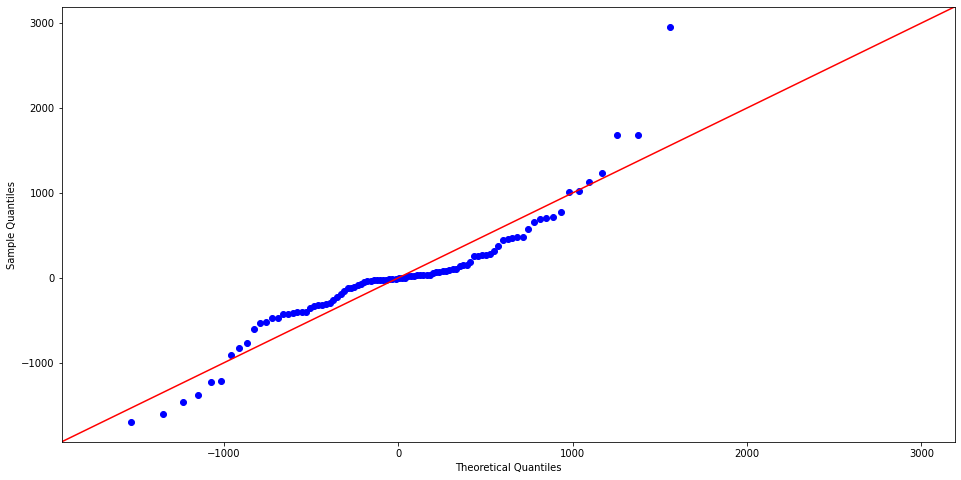

In [100]:
fig, ax = plt.subplots(figsize=(16,8))
sm.qqplot(resid['residuals'], loc=resid['residuals'].mean(), scale = resid['residuals'].std(), line='45', ax=ax)
fig.show()

# Предсказание будущих показателей

In [101]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          new_cases   No. Observations:                   94
Model:             SARIMAX(1, 4, 1)x(1, 2, 1, 24)   Log Likelihood                -335.235
Date:                            Wed, 22 Dec 2021   AIC                            680.471
Time:                                    05:09:20   BIC                            689.159
Sample:                                03-01-2020   HQIC                           683.655
                                     - 12-12-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6907      0.164     -4.219      0.000      -1.012      -0.370
ma.L1         -0.9999    177.178     -0.006      0.995    -348.263     346.263
ar.S.L24      -0.7067      0.120     -5.887      0.000      -0.942      -0.471
ma.S.L24      -0.9989    177.287     -0.006      0.996    -348.474     346.476
sigma2      2.243e+05      0.001   2.78e+08      0.000    2.24e+05    2.24e+05
===================================================================================
Ljung-Box (Q):                       51.09   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.11   Prob(JB):                         0.95
Heteroskedasticity (H):               2.24   Skew:                             0.11
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.12e+26. Standard errors may be unstable.
"""

Последняя дата во временном ряду:  2021-12-12 00:00:00
Предсказание на 4 недели, до: 2022-01-09 00:00:00


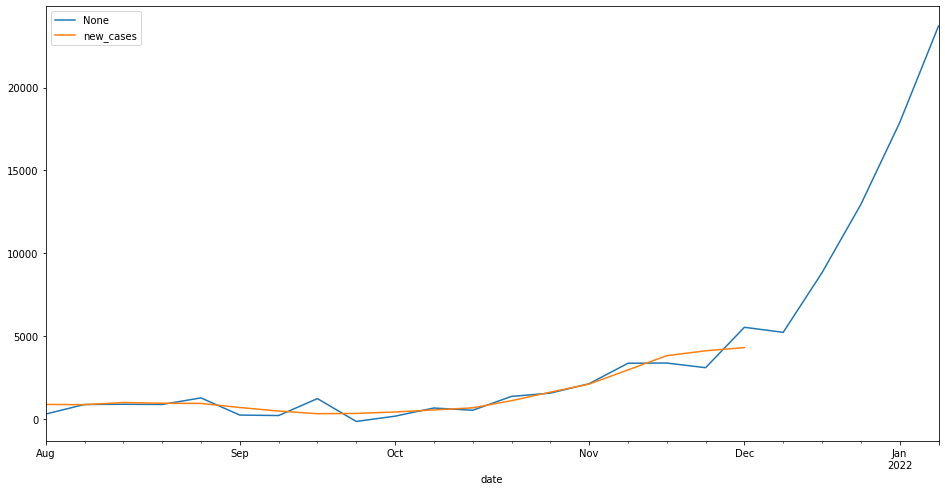

In [102]:
weeks_pred = 4 # количество недель для предсказания !!!!!!!!!!!!!

print("Последняя дата во временном ряду: ", ts.index[-1])
print(f"Предсказание на {weeks_pred} недели, до: {ts.index[-1] + timedelta(weeks=weeks_pred)}")

fig, ax = plt.subplots(figsize=(16,8))
pred = sarima.predict(start=ts.index[-20], end=(ts.index[-1] + timedelta(weeks=weeks_pred)), typ='levels')
pred.plot(ax=ax)
ts[-20:-1].plot(ax=ax)
plt.legend()
fig.show()

In [103]:
pred = sarima.predict(start=ts.index[-1] + timedelta(days=1), end=(ts.index[-1] + timedelta(weeks=weeks_pred)), typ='levels')
pred

2021-12-19     8834.346487
2021-12-26    12949.507897
2022-01-02    17883.116841
2022-01-09    23706.612196
Freq: W-SUN, dtype: float64

## Сохраняем предсказания и доверительные интервалы в Excel-файл

In [104]:
forecast = pd.DataFrame(columns=['value'], index=pred.index)
res = sarima.forecast(weeks_pred)
forecast['value'] = res
forecast.to_excel('forecast_sarima.xlsx')
forecast

value
2021-12-19   8834.346487
2021-12-26  12949.507897
2022-01-02  17883.116841
2022-01-09  23706.612196